# 二叉树就是分组计算MSE而不是统一计算

在节点划分中的损失评估：
在决策树回归中，选择如何划分节点的依据是最小化 节点划分后的均方误差（MSE）。假设我们在节点 $T$ 上选择了一个特征 $X_j$ 进行划分，使用阈值 $v$ 来将数据划分为两部分：左子节点和右子节点。
- 左子节点包含所有满足 $X_j \leq v$ 的数据点。
- 右子节点包含所有满足 $X_j > v$ 的数据点。
对于节点 $T$，假设左子节点的均方误差是 $\text{MSE}_{\text{left}}$，右子节点的均方误差是 $\text{MSE}_{\text{right}}$，则总的均方误差为：
$\text{MSE}_T = \frac{n_{\text{left}}}{n_T} \cdot \text{MSE}_{\text{left}} + \frac{n_{\text{right}}}{n_T} \cdot \text{MSE}_{\text{right}}$
其中：
$n_T$ 是节点 $T$ 的样本数
$n_{\text{left}}$ 和 $n_{\text{right}}$ 分别是左子节点和右子节点的样本数
计算子节点的均方误差（MSE）
对于每个子节点 $T_{\text{left}}$ 和 $T_{\text{right}}$，它们的均方误差 $\text{MSE}_{\text{left}}$ 和 $\text{MSE}_{\text{right}}$ 分别定义为：
$\text{MSE}_{\text{left}} = \frac{1}{n_{\text{left}}} \sum_{i \in T_{\text{left}}} (y_i - \hat{y}_{\text{left}})^2$
$\text{MSE}_{\text{right}} = \frac{1}{n_{\text{right}}} \sum_{i \in T_{\text{right}}} (y_i - \hat{y}_{\text{right}})^2$
其中：
$\hat{y}_{\text{left}}$ 是左子节点样本的预测均值，通常取左子节点所有样本 $y_i$ 的均值。
$\hat{y}_{\text{right}}$ 是右子节点样本的预测均值，通常取右子节点所有样本 $y_i$ 的均值。
寻找最优的划分点
在决策树的训练过程中，目标是通过遍历所有可能的特征和划分点，选择 使得MSE最小的划分。具体来说：
- 对于每个特征 $X_j$，遍历该特征的所有可能值（或预先定义的一些阈值）作为划分点。
- 对于每个划分点，计算对应的 均方误差。
- 选择 MSE最小的划分点。

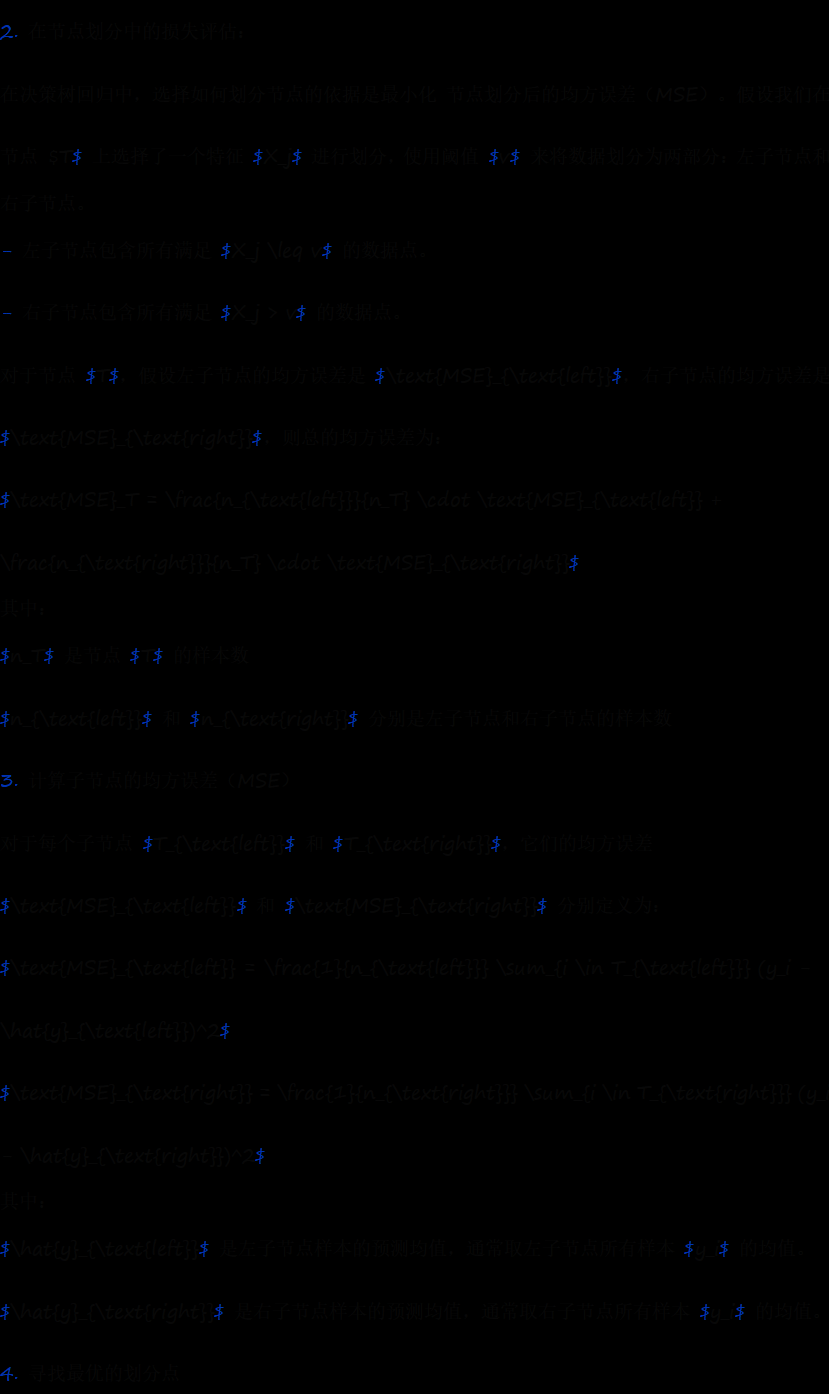
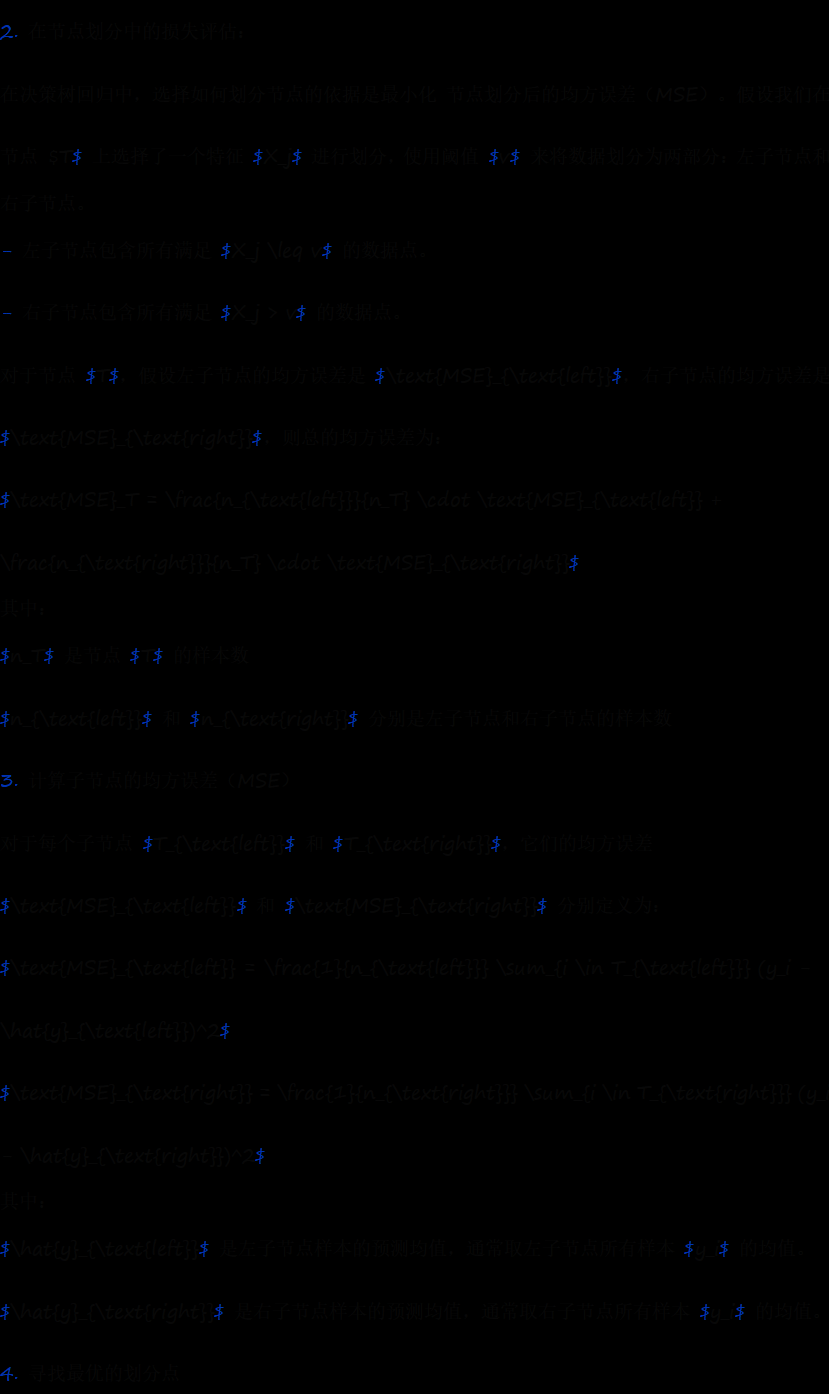
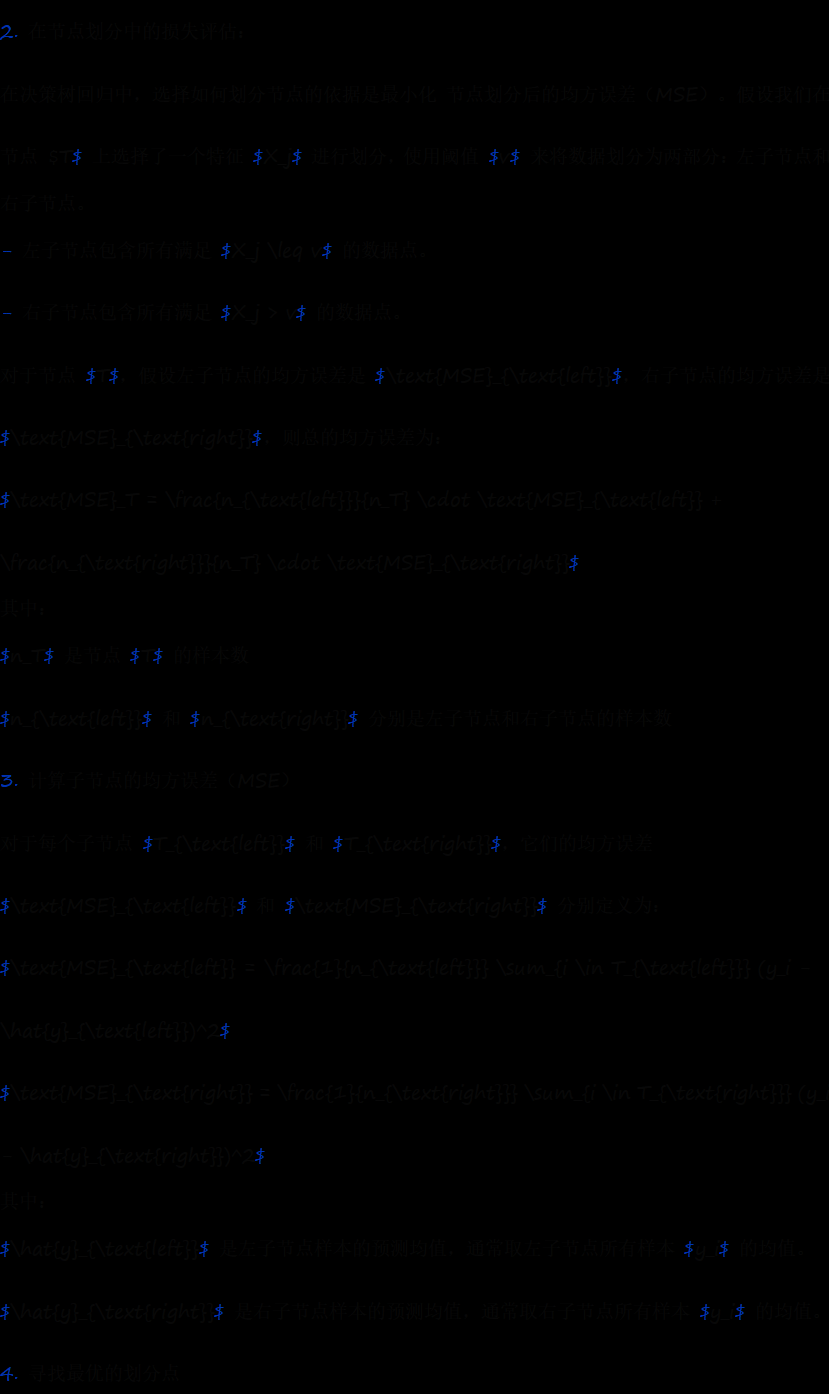

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# 加载 California Housing 数据集
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 数据集基本信息
print(X.head())  # 显示前5行数据
print(y.head())  # 显示前5行目标值

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


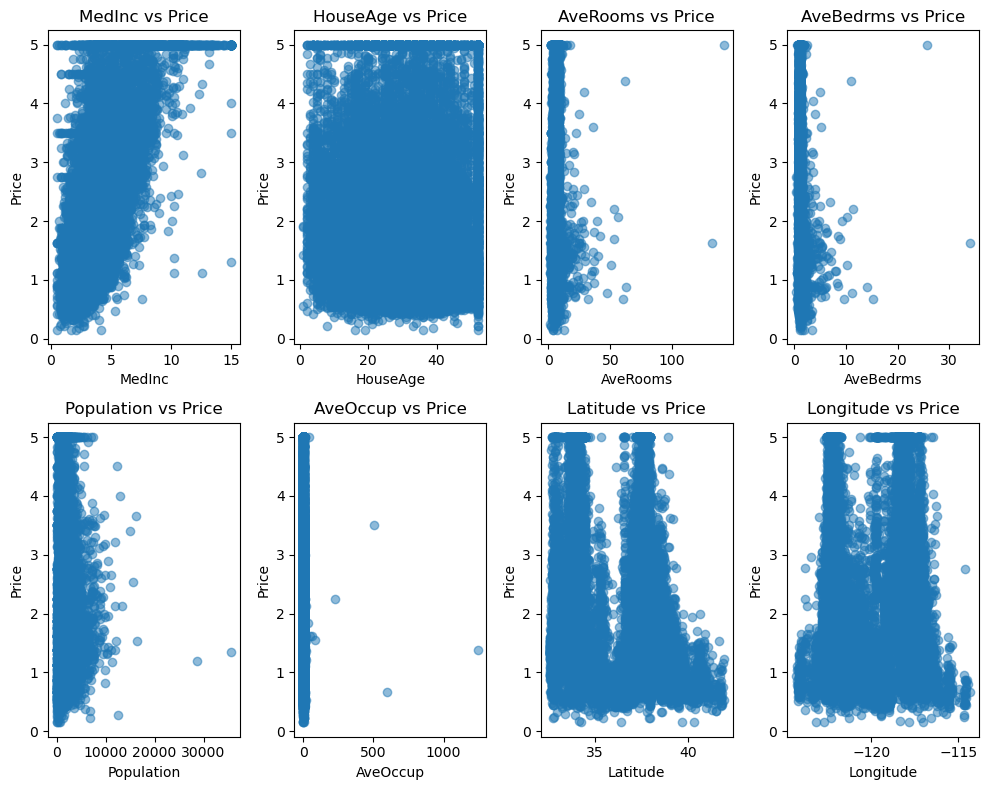

In [15]:
# 可视化特征之间的关系
plt.figure(figsize=(10, 8))

for i, column in enumerate(X.columns):
    plt.subplot(2, 4, i+1)
    plt.scatter(X[column], y, alpha=0.5)
    plt.title(f'{column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [16]:
# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# 使用决策树回归
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 预测训练集和测试集
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 评估模型
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R^2: {train_r2:.2f}")
print(f"Testing R^2: {test_r2:.2f}")

Training MSE: 0.00
Testing MSE: 0.49
Training R^2: 1.00
Testing R^2: 0.62


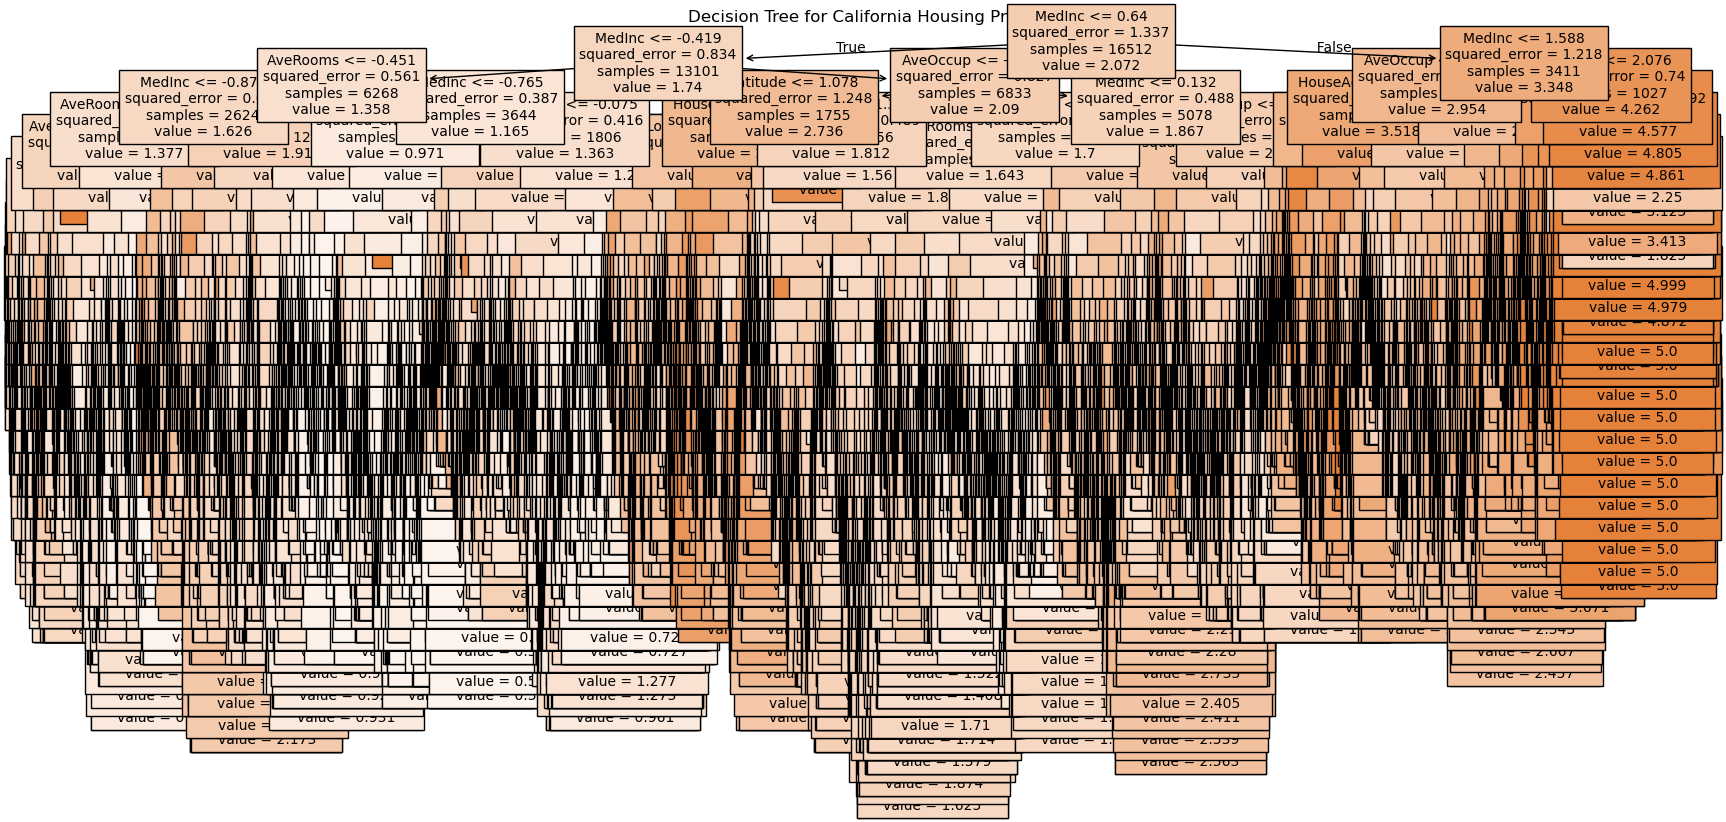

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Decision Tree for California Housing Prices")
plt.show()

In [19]:
# 定义参数范围
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# 使用网格搜索进行交叉验证
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 输出最佳参数和得分
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation MSE:", -grid_search.best_score_)

# 使用最佳参数训练模型
best_model = grid_search.best_estimator_
y_test_pred_optimized = best_model.predict(X_test)

# 评估优化后的模型
test_mse_optimized = mean_squared_error(y_test, y_test_pred_optimized)
test_r2_optimized = r2_score(y_test, y_test_pred_optimized)

print(f"Optimized Testing MSE: {test_mse_optimized:.2f}")
print(f"Optimized Testing R^2: {test_r2_optimized:.2f}")

Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation MSE: 0.38677718831054475
Optimized Testing MSE: 0.41
Optimized Testing R^2: 0.69


C:\Users\chenx\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chenx\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chenx\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\chenx\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\chenx\anaconda3\Lib\site-packag

In [20]:
# 比较优化前后的表现
print(f"Before Optimization - Testing MSE: {test_mse:.2f}, Testing R^2: {test_r2:.2f}")
print(f"After Optimization - Testing MSE: {test_mse_optimized:.2f}, Testing R^2: {test_r2_optimized:.2f}")

Before Optimization - Testing MSE: 0.49, Testing R^2: 0.62
After Optimization - Testing MSE: 0.41, Testing R^2: 0.69


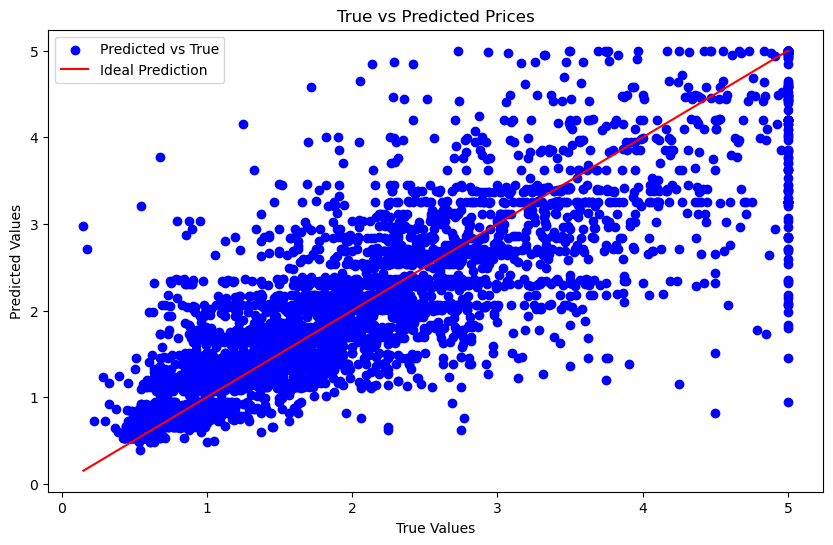

In [21]:
# 可视化真实值和预测值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_optimized, color='blue', label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()

In [13]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# # 无需 Dask，用 Pandas 直接保存 CSV 即可（更简单）
# from sklearn.datasets import fetch_california_housing
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
#
# # 1. 加载 California Housing 数据集（返回 Bunch 对象）
# bunch_data = fetch_california_housing()
#
# # 2. 提取特征（X）和目标值（y），构建完整 DataFrame（用于保存 CSV）
# X = pd.DataFrame(bunch_data.data, columns=bunch_data.feature_names)
# y = pd.Series(bunch_data.target, name="MedHouseVal")  # 目标值列名：房屋中位数价值
# full_data = pd.concat([X, y], axis=1)  # 合并特征和目标值，形成完整数据集
#
# # 3. 保存为 CSV（此时 full_data 是 Pandas DataFrame，to_csv 正常工作）
# full_data.to_csv(
#     "fetched_california_housing.csv",
#     index=False,          # 不保存行索引
#     encoding="utf-8-sig"  # 支持中文（若有中文标签可正常显示）
# )
# print("CSV 文件已保存成功！")
#
# # 4. 后续建模用的 X 和 y 已正确定义，可继续后续步骤
# print("\n特征数据前5行：")
# print(X.head())
# print("\n目标值前5行：")
# print(y.head())
#
# # ---------------------- 以下是你后续可继续的建模步骤（示例）----------------------
# # 数据分割
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # 标准化（决策树对标准化不敏感，可省略，但保留你的代码逻辑）
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
#
# # 决策树回归建模
# dt_reg = DecisionTreeRegressor(random_state=42)
# dt_reg.fit(X_train_scaled, y_train)
#
# # 预测与评估
# y_pred = dt_reg.predict(X_test_scaled)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"\n测试集 MSE：{mse:.4f}")
# print(f"测试集 R²：{r2:.4f}")

CSV 文件已保存成功！

特征数据前5行：
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

目标值前5行：
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

测试集 MSE：0.4940
测试集 R²：0.6230
